# Dataset Exploration

### Load Data and Display First Values

In [1]:
import pandas as pd

data = pd.read_csv("results.csv")
data.head(3)

,hash,diff,message,author_email,author_name,committer_email,committer_name,project,split
0,1de640cc59b4b3030447d567b3c99c50777bd760,a/setup.py b/setup.py\nindex <HASH>..<HASH> 1...,setup: Detect if wheel and twine installed,gcushen@users.noreply.github.com,George Cushen,gcushen@users.noreply.github.com,George Cushen,gcushen_mezzanine-api,train
1,c1cce6fe5e49df5546c30a662fd141d41f4fc389,a/Builder.php b/Builder.php\nindex <HASH>..<H...,[Builder] Adding root page in any case,g.passault@gmail.com,Gregwar,g.passault@gmail.com,Gregwar,Gregwar_Slidey,train
2,2f7d97d15ea41f4112e74429617c5daad740d7cc,a/web.go b/web.go\nindex <HASH>..<HASH> 10064...,Added web.Urlencode method,hoisie@gmail.com,Michael Hoisie,hoisie@gmail.com,Michael Hoisie,hoisie_web,train


### Get First Overview on Data

In [2]:
data.describe()

,hash,diff,message,author_email,author_name,committer_email,committer_name,project,split
count,1665091,1665091,1665091,1664259,1664949,1664285,1664937,1665091,1665091
unique,1665091,1659398,1605673,219575,195197,169316,150739,71532,3
top,1de640cc59b4b3030447d567b3c99c50777bd760,a/tests/input/logictree_test.py b/tests/input...,Apply fixes from StyleCI (#<I>),michele.simionato@gmail.com,Michele Simionato,noreply@github.com,GitHub,saltstack_salt,train
freq,1,7,1307,4991,5077,96629,96659,17501,1165564


We see that there are 1.665.091 entries in our dataset.

There are 1.605.673 unique commit messages created by 169.316 different committers (counted by emails) of 71.532 different projects.

## Tokenize and Generate Vocabulary

### Standard NLTK-Tokenizer

Start with the standard nltk tokenizer and explore the vocabulary size without and with lowercasing every letter.

In [3]:
import nltk

# standard without lowercasing
data["std_tokenized_message"] = data['message'].apply(nltk.tokenize.word_tokenize)

std_tokenized_messages = []
std_tokenized_messages.extend(data["std_tokenized_message"].values)
std_tokenized_messages_flat = [item for sublist in std_tokenized_messages for item in sublist]
std_total_vocab = nltk.lm.Vocabulary(std_tokenized_messages_flat)

print("The vocabulary contains {std_vocab_count} tokens using the standard nltk tokenizer without removing stopwords.".format(std_vocab_count = len(std_total_vocab.counts)))

# standard with lowercasing
lower_std_tokenized_messages_flat = [item.lower() for sublist in std_tokenized_messages for item in sublist]
lower_std_total_vocab = nltk.lm.Vocabulary(lower_std_tokenized_messages_flat)

print("The lowercased vocabulary contains {lower_std_vocab_count} tokens using the standard nltk tokenizer without removing stopwords.".format(lower_std_vocab_count = len(lower_std_total_vocab.counts)))

The vocabulary contains 799001 tokens using the standard nltk tokenizer without removing stopwords.
The lowercased vocabulary contains 729164 tokens using the standard nltk tokenizer without removing stopwords.


Check whether the tokenizer is doing good.

In [4]:
for i in range(3):
    print(str(data['message'][i + 11]) + " --> " + str(std_tokenized_messages[i + 11]))
    print()

Handle asynchronous rendering in tests --> ['Handle', 'asynchronous', 'rendering', 'in', 'tests']

Remove the overriden "GuildImpl#getIconUrl()" implementation

The guild interface already has the proper implementation, we don't need the overriden method anymore. --> ['Remove', 'the', 'overriden', '``', 'GuildImpl', '#', 'getIconUrl', '(', ')', "''", 'implementation', 'The', 'guild', 'interface', 'already', 'has', 'the', 'proper', 'implementation', ',', 'we', 'do', "n't", 'need', 'the', 'overriden', 'method', 'anymore', '.']

DOC: Added DataFrame in Parameters & Return description in the docstring (#<I>)

* DOC: Added DataFrame in Parameters & Return description in the docstring



* DOC: Reduced number of characters in Line <I>



* DOC: removed trailing whitespaces



* DOC: Removed redundant text and fixed punctuation. --> ['DOC', ':', 'Added', 'DataFrame', 'in', 'Parameters', '&', 'Return', 'description', 'in', 'the', 'docstring', '(', '#', '<', 'I', '>', ')', '*', 'DOC', ':', 'Add

### Twitter Tokenizer from NLTK

Evaluate the twitter tokenizer and check if there is any difference.

In [5]:
# twitter without lowercasing
data["tweet_tokenized_message"] = data['message'].apply(nltk.tokenize.TweetTokenizer().tokenize)

tweet_tokenized_messages = []
tweet_tokenized_messages.extend(data["tweet_tokenized_message"].values)
tweet_tokenized_messages_flat = [item for sublist in tweet_tokenized_messages for item in sublist]
tweet_total_vocab = nltk.lm.Vocabulary(tweet_tokenized_messages_flat)
print("The vocabulary contains {tweet_vocab_count} tokens using the twitter tokenizer without removing stopwords.".format(tweet_vocab_count = len(tweet_total_vocab.counts)))

# twitter with lowercasing
lower_tweet_tokenized_messages_flat = [item.lower() for sublist in tweet_tokenized_messages for item in sublist]
lower_tweet_total_vocab = nltk.lm.Vocabulary(lower_tweet_tokenized_messages_flat)

print("The lowercased vocabulary contains {lower_tweet_vocab_count} tokens using the twitter tokenizer without removing stopwords.".format(lower_tweet_vocab_count = len(lower_tweet_total_vocab.counts)))

The vocabulary contains 716726 tokens using the twitter tokenizer without removing stopwords.
The lowercased vocabulary contains 647026 tokens using the twitter tokenizer without removing stopwords.


In [6]:
for i in range(3):
    print(str(data['message'][i + 11]) + " --> " + str(tweet_tokenized_messages[i + 11]))
    print()

Handle asynchronous rendering in tests --> ['Handle', 'asynchronous', 'rendering', 'in', 'tests']

Remove the overriden "GuildImpl#getIconUrl()" implementation

The guild interface already has the proper implementation, we don't need the overriden method anymore. --> ['Remove', 'the', 'overriden', '"', 'GuildImpl', '#getIconUrl', '(', ')', '"', 'implementation', 'The', 'guild', 'interface', 'already', 'has', 'the', 'proper', 'implementation', ',', 'we', "don't", 'need', 'the', 'overriden', 'method', 'anymore', '.']

DOC: Added DataFrame in Parameters & Return description in the docstring (#<I>)

* DOC: Added DataFrame in Parameters & Return description in the docstring



* DOC: Reduced number of characters in Line <I>



* DOC: removed trailing whitespaces



* DOC: Removed redundant text and fixed punctuation. --> ['DOC', ':', 'Added', 'DataFrame', 'in', 'Parameters', '&', 'Return', 'description', 'in', 'the', 'docstring', '(', '#', '<I>', ')', '*', 'DOC', ':', 'Added', 'DataFrame', 

The selection of the tokenizer influences vocabulary size and tokenization quality:

<u>Vocabulary Size</u>
|  | mixed | lowercased |
| --- | --- | --- |
| Standard NLTK | 799001 | 729164 |
| Twitter | 716726 | 647026 |

The split of the twitter tokenizer seems to be more reasonable because of the following two examples:

<u>Tokenization Examples</u>
| Text | Standard Tokenizer | Twitter Tokenizer |
| --- | --- | --- |
| "GuildImpl#getIconUrl()" | ['``', 'GuildImpl', '#', 'getIconUrl', '(', ')', "''"] | ['"', 'GuildImpl', '#getIconUrl', '(', ')', '"'] |
| &lt;I> | ['<', 'I', '>'] | ['&lt;I>'] |

While there are almost no differences on normal text, for special terms the twitter tokenizer should maintain higher information quality.

That is why the specialized twitter tokenizer is used for further investigation.

## Stop Word Removal

In [7]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

tweet_tokenized_messages_flat_without_stopwords = [item for item in tweet_tokenized_messages_flat if not item in stopwords]
vocab = nltk.lm.Vocabulary(tweet_tokenized_messages_flat_without_stopwords)
print("The twitter vocabulary contains {vocab_count} tokens when removing stopwords.".format(vocab_count = len(vocab.counts)))

lower_tweet_tokenized_messages_flat_without_stopwords = [item for item in lower_tweet_tokenized_messages_flat if not item in stopwords]
vocab = nltk.lm.Vocabulary(lower_tweet_tokenized_messages_flat_without_stopwords)
print("The lowercased twitter vocabulary contains {vocab_count} tokens when removing stopwords.".format(vocab_count = len(vocab.counts)))

The twitter vocabulary contains 716552 tokens when removing stopwords.
The lowercased twitter vocabulary contains 646852 tokens when removing stopwords.


Stopword removal led to excluding only few tokens. That is reasonable because:

In [8]:
len(stopwords)

179

## Commit Message Length Statistics

In [9]:
import numpy as np

def print_statistics(values : list):
    mean = np.mean(values)
    std = np.std(values)
    min = np.min(values)
    lower_quartile = np.percentile(values, 25)
    median = np.median(values)
    upper_quartile = np.percentile(values, 75)
    max = np.max(values)

    print("Mean: " + str(mean))
    print("Standard deviation: " + str(std))
    print("Minimum: " + str(min))
    print("25 % quartile: " + str(lower_quartile))
    print("Median: " + str(median))
    print("75 % quartile: " + str(upper_quartile))
    print("Maximum: " + str(max))
    print()

In [10]:
tokenized_messages_length = [len(sublist) for sublist in tweet_tokenized_messages]
one_word_count = tokenized_messages_length.count(1)

print("Statistics on the length of commit messages:")
print_statistics(tokenized_messages_length)
print("There are {one_word_count} messages that contain only one word, which is considered as a bad commit message. \n[Paper: 'What makes a good commit message?']".format(one_word_count = one_word_count))

Statistics on the length of commit messages:
Mean: 13.700263829424339
Standard deviation: 12.173787795636391
Minimum: 1
25 % quartile: 7.0
Median: 10.0
75 % quartile: 15.0
Maximum: 139

There are 1306 messages that contain only one word, which is considered as a bad commit message. 
[Paper: 'What makes a good commit message?']


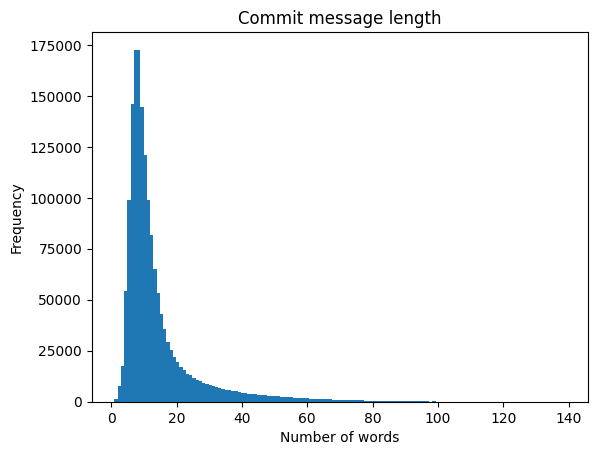

In [11]:
import matplotlib.pyplot as plt

hist = np.histogram(tokenized_messages_length, bins=np.max(tokenized_messages_length))
plt.stairs(hist[0], hist[1], fill=True)
plt.title("Commit message length")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.show()

## Committer Statistics

In [12]:
from collections import Counter

print("Most common committers:")

committer_count = Counter(data["committer_email"])
committer_count.most_common(20)

Most common committers:


[('noreply@github.com', 96629),
 ('michele.simionato@gmail.com', 4988),
 ('crynobone@gmail.com', 3045),
 ('thomas.parrott@canonical.com', 2938),
 ('jaraco@jaraco.com', 2878),
 ('postmodern.mod3@gmail.com', 2653),
 ('github@contao.org', 2320),
 ('igor.kroitor@gmail.com', 2267),
 ('mark@mark-story.com', 2201),
 ('pedro@algarvio.me', 2112),
 ('marijnh@gmail.com', 1995),
 ('ccordoba12@gmail.com', 1990),
 ('thatch45@gmail.com', 1964),
 ('fabien.potencier@gmail.com', 1829),
 ('mjpt777@gmail.com', 1817),
 ('mitchell.hashimoto@gmail.com', 1804),
 ('taylor@laravel.com', 1713),
 ('moodler', 1688),
 ('aaron.patterson@gmail.com', 1508),
 ('ocramius@gmail.com', 1427)]

In [13]:
print("Statistics on commits per committer:")
print_statistics(list(committer_count.values()))

Statistics on commits per committer:
Mean: 9.834163137782975
Standard deviation: 238.94485349063467
Minimum: 1
25 % quartile: 1.0
Median: 2.0
75 % quartile: 5.0
Maximum: 96629



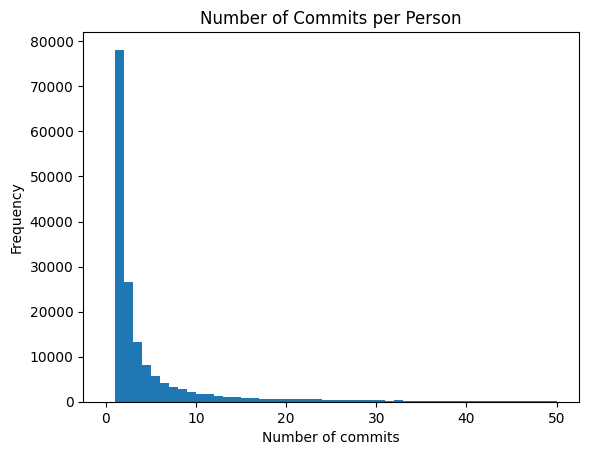

Mind that some committers made more than 50 commits. Including them would make the plot unable to perceive.


In [14]:
commiter_hist = np.histogram(list(committer_count.values()), bins=50, range=(0, 50))
plt.stairs(commiter_hist[0], commiter_hist[1], fill=True)
plt.title("Number of Commits per Person")
plt.xlabel("Number of commits")
plt.ylabel("Frequency")
plt.show()
print("Mind that some committers made more than 50 commits. Including them would make the plot unable to perceive.")

## Commit Message Frequency Statistics

In [15]:
print("Most common commit messages:")

message_count = Counter(data["message"])
message_count.most_common(20)

Most common commit messages:


[('Apply fixes from StyleCI (#<I>)', 1307),
 ('<URL>', 519),
 ('Scrutinizer Auto-Fixes\n\nThis commit consists of patches automatically generated for this project on <URL>',
  401),
 ('Bump to <I>', 396),
 ('bumped Symfony version to <I>', 306),
 ('dvc: bump to <I>', 292),
 ('version: post-release bump', 267),
 ('Apply fixes from StyleCI (#<I>)\n\n[ci skip] [skip ci]', 267),
 ('Apply suggestions from code review', 265),
 ('Bumped to <I> in preparation for next release.', 260),
 ('Bump up version\n\n[skip ci]', 240),
 ('Update version number to <I>', 217),
 ('prepare for release of <I>\n\nsvn commit r<I>', 204),
 ('(GEM) update bolt version to <I>', 199),
 ('Bump to version <I>', 188),
 ('Applied fixes from StyleCI (#<I>)', 179),
 ('Automagically formatted by Duti!\n\n<URL>', 166),
 ('Bumped version to <I>', 164),
 ('Bumping version to <I>', 139),
 ('sync with pypi version: <I>', 137)]

In [16]:
print("Statistics on occurences of commit messages:")
print_statistics(list(message_count.values()))

Statistics on occurences of commit messages:
Mean: 1.0370050439908998
Standard deviation: 1.5174083564317877
Minimum: 1
25 % quartile: 1.0
Median: 1.0
75 % quartile: 1.0
Maximum: 1307



## Exploration with spaCy

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [18]:
from spacy import displacy

print("Structure of first commit message as an example")
displacy.render(nlp(data["message"][0]))

Structure of first commit message as an example


Take a subset because unable to process all data locally.

In [19]:
subset_size = 100000

messages = data["message"][:subset_size].tolist()

In [23]:
first_tokens = []
tokens = []
token_tags = []
cats = []
ents = []
sentiments = []
polarities = []
subjectivities = []
imperative_count = []

def token_filter(token):
    return not token.is_stop and token.is_alpha

docs = nlp.pipe(messages)

from spacytextblob.spacytextblob import SpacyTextBlob

# the following installations are required
# python -m textblob.download_corpora
# python -m spacy download en_core_web_sm

nlp.add_pipe('spacytextblob')

for doc in docs:
    first_tokens.append(doc[0].lemma_)
    tokens.extend([token.lemma_ if token_filter(token) else None for token in doc])
    token_tags.extend([token.tag_ for token in doc])
    cats.extend(doc.cats if doc.cats != "" else "")
    ents.extend([ent.lemma_ for ent in doc.ents])
    sentiments.append(doc.sentiment)
    polarities.append(doc._.blob.polarity)
    subjectivities.append(doc._.blob.subjectivity)
    imperative_count.extend([token.morph for token in doc])

### First Tokens of a Commit Message

In [24]:
print("20 most common first (lemmatized) tokens in first {subset_size} messages:".format(subset_size = subset_size))

first_tokens_count = Counter(first_tokens)
first_tokens_count.most_common(20)

20 most common first (lemmatized) tokens in first 100000 messages:


[('fix', 12120),
 ('add', 11359),
 ('remove', 4198),
 ('[', 3935),
 ('update', 3218),
 ('use', 2106),
 ('do', 2047),
 ('make', 1876),
 ('Fix', 1757),
 ('change', 1635),
 ('allow', 1022),
 ('test', 980),
 ('bump', 657),
 ('move', 600),
 ('#', 539),
 ('check', 533),
 ('ensure', 530),
 ('set', 522),
 ('only', 492),
 ('bugfix', 472)]

### Tokens of a Commit Message

In [25]:
print("20 most common (lemmatized) alphabetical tokens in first {subset_size} messages excluding stopwords:".format(subset_size = subset_size))

tokens_count = Counter(tokens)
tokens_count.most_common(21)[1:]

20 most common (lemmatized) alphabetical tokens in first 100000 messages excluding stopwords:


[('fix', 20749),
 ('add', 17329),
 ('test', 11266),
 ('remove', 7423),
 ('use', 6156),
 ('update', 5640),
 ('change', 5470),
 ('method', 5208),
 ('error', 5186),
 ('url', 3951),
 ('file', 3932),
 ('check', 3768),
 ('version', 3606),
 ('issue', 3549),
 ('set', 3423),
 ('support', 3040),
 ('bug', 3003),
 ('return', 2833),
 ('Fix', 2655),
 ('code', 2644)]

### Token Tags

In [26]:
print("Most common token tags in first {subset_size} messages:".format(subset_size = subset_size))

token_tags_count = Counter(token_tags)
token_tags_count.most_common(10)

Most common token tags in first 100000 messages:


[('NN', 294339),
 ('IN', 137675),
 ('VB', 94535),
 ('NNP', 90266),
 ('DT', 75444),
 ('JJ', 72476),
 ('NNS', 70804),
 ('XX', 62388),
 ('RB', 51032),
 ('_SP', 46894)]

Check meaning of token tags with:

In [27]:
spacy.explain("JJ")

'adjective (English), other noun-modifier (Chinese)'

### Categories

In [28]:
print("Spacy finds the following categories: " + str(cats))
print("(Not expected to find any categories)")

Spacy finds the following categories: []
(Not expected to find any categories)


### Entities

In [29]:
ents_count = Counter(ents)
print("20 most common (lemmatized) entities in first {subset_size} messages:".format(subset_size = subset_size))
ents_count.most_common(20)

20 most common (lemmatized) entities in first 100000 messages:


[('first', 867),
 ('fix', 716),
 ('one', 666),
 ('fix #', 580),
 ('1', 477),
 ('2', 473),
 ('#', 447),
 ('0', 433),
 ('3', 429),
 ('api', 395),
 ('two', 370),
 ('Python', 321),
 ('API', 294),
 ('doc', 293),
 ('CI', 251),
 ('PHP', 236),
 ('improve', 234),
 ('second', 223),
 ('json', 200),
 ('zero', 193)]

### Sentiments

In [30]:
print_statistics(sentiments)

Mean: 0.0
Standard deviation: 0.0
Minimum: 0.0
25 % quartile: 0.0
Median: 0.0
75 % quartile: 0.0
Maximum: 0.0



Spacy Sentiment is always zero.

### Polarities

In [31]:
print_statistics(polarities)

Mean: 0.012914568989495398
Standard deviation: 0.16576854685975387
Minimum: -1.0
25 % quartile: 0.0
Median: 0.0
75 % quartile: 0.0
Maximum: 1.0



There are only minor polarities found in the commit messages.

### Subjectivities

In [32]:
print_statistics(subjectivities)

Mean: 0.17876842287919062
Standard deviation: 0.27419620402845424
Minimum: 0.0
25 % quartile: 0.0
Median: 0.0
75 % quartile: 0.3333333333333333
Maximum: 1.0



Most commit messages are objective (subjectivity score of 0.0).

### Imperative Counts

In [33]:
imperative_count

[Number=Sing,
 ,
 VerbForm=Inf,
 ,
 Number=Sing,
 ConjType=Cmp,
 VerbForm=Inf,
 Aspect=Perf|Tense=Past|VerbForm=Part,
 ,
 Number=Sing,
 ,
 Aspect=Prog|Tense=Pres|VerbForm=Part,
 Number=Sing,
 Number=Sing,
 ,
 ,
 Number=Sing,
 Aspect=Perf|Tense=Past|VerbForm=Part,
 Number=Sing,
 PunctType=Peri,
 Number=Sing,
 Number=Sing,
 VerbForm=Inf,
 ,
 PunctType=Dash,
 Aspect=Perf|Tense=Past|VerbForm=Part,
 Number=Plur,
 ,
 Case=Nom|Person=2|PronType=Prs,
 Mood=Ind|Tense=Pres|VerbForm=Fin,
 Polarity=Neg,
 VerbForm=Inf,
 Number=Sing,
 Number=Sing,
 ConjType=Cmp,
 Degree=Pos,
 Number=Plur,
 PunctType=Peri,
 Number=Sing,
 ,
 Number=Sing,
 Number=Plur,
 VerbForm=Fin,
 VerbForm=Inf,
 Definite=Def|PronType=Art,
 Number=Sing,
 ,
 ,
 Degree=Pos,
 Degree=Pos,
 Number=Plur,
 Number=Sing|Person=3|Tense=Pres|VerbForm=Fin,
 ,
 VerbForm=Inf,
 Definite=Ind|PronType=Art,
 Degree=Cmp,
 Number=Sing,
 PunctType=Peri,
 VerbForm=Inf,
 ,
 Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin,
 Aspect=Perf|Tense=Past|Ver

Spacy seems not to be able to detect imperatives.